## Speech emotions recognition

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import os
import pathlib
from sklearn.metrics import accuracy_score

In [118]:
big_arr =[] 
def Get_mean(lst):
    means = []
    for l in lst:
        means.append(sum(l) / len(l))
        
    return means

def Ext_Features(files , tmp, lab ,  mfc , Chrm, mel , cspec  , tont  , lable ):
    
    for audio in files:
        y = tmp+ audio
        
        x , samp_rate = librosa.load(y)
        mfcc =  librosa.feature.mfcc(x, samp_rate)
        chroma =librosa.feature.chroma_stft(x, samp_rate)
        melspec = librosa.feature.melspectrogram(x, samp_rate)
        cont_spec = librosa.feature.spectral_contrast(x, samp_rate)
        tonnet = librosa.feature.tonnetz(x, samp_rate)
        
        mfc.append(Get_mean(mfcc))
        Chrm.append(Get_mean(chroma))
        mel.append(Get_mean(melspec))
        cspec.append(Get_mean(cont_spec))
        tont.append(Get_mean(tonnet))
        lable.append(lab)
   

# 01

In [119]:
SERDataset = os.listdir("SERDataset/Train/")
fold = 'SERDataset/Train/'
count = 0
z = 0
mfc = []
Chrm = []
mel = []
cspec = []
tont = []
lable = []
for  emotion in SERDataset:
    tmp = fold + SERDataset[count] + '/'
    files = os.listdir(tmp)
    Ext_Features(files , tmp,SERDataset[count] , mfc , Chrm, mel , cspec  , tont  , lable)
    count = count + 1

Feat = np.hstack([Chrm,mfc,mel,tont,cspec])
Feat.shape

c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=690
  n_fft, y.shape[-1]
c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=684
  n_fft, y.shape[-1]
c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=342
  n_fft, y.shape[-1]


<IPython.core.display.Javascript object>

(385, 173)

In [120]:
df = pd.DataFrame(Feat)

# Data Frame

In [121]:
df

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,0.390997,0.486587,0.488800,0.240859,0.191954,0.202046,0.267662,0.295250,0.301321,0.338320,...,-0.008467,0.003791,0.000539,11.897101,15.819116,19.314536,18.885436,18.104238,22.712248,38.035635
1,0.505567,0.479773,0.532374,0.190555,0.067019,0.063408,0.079541,0.102600,0.141719,0.143956,...,-0.012582,-0.028365,-0.010180,24.192364,16.862102,22.348810,18.729588,19.573040,19.595062,36.635076
2,0.333698,0.435960,0.455421,0.385315,0.308775,0.272410,0.222395,0.268380,0.352054,0.349881,...,-0.010689,-0.007271,-0.004514,25.121340,15.140859,19.014724,17.158957,18.412336,21.267897,36.748480
3,0.336602,0.439903,0.486708,0.457499,0.365161,0.192369,0.128502,0.178538,0.243278,0.198108,...,-0.001208,0.005103,0.010076,24.413762,15.414932,21.580526,18.088596,17.914885,23.450916,39.127562
4,0.227734,0.386001,0.545882,0.570440,0.401396,0.303949,0.188280,0.153384,0.206857,0.220856,...,-0.012546,-0.008059,-0.007541,24.610972,15.918531,20.236271,18.330065,19.521442,22.652619,39.134178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.556794,0.520756,0.516292,0.459943,0.479024,0.572577,0.604209,0.616385,0.630648,0.638282,...,-0.051289,0.004485,-0.004742,18.082162,12.768294,15.673919,17.010115,16.517034,17.239483,43.946052
381,0.408294,0.520679,0.467870,0.471401,0.274876,0.203569,0.219915,0.210597,0.293917,0.396867,...,-0.022035,0.016742,-0.001634,20.376331,14.437905,17.595120,15.515041,17.490818,18.714743,33.750266
382,0.422937,0.318707,0.306491,0.365852,0.348208,0.241354,0.217123,0.286456,0.408120,0.479980,...,0.017718,0.002551,-0.000508,19.664288,14.725288,17.987119,15.373803,17.788561,17.538438,34.219558
383,0.525208,0.330598,0.351617,0.429839,0.357254,0.260539,0.279025,0.294523,0.293220,0.327765,...,-0.040304,-0.018623,-0.008689,20.629220,14.707034,18.325243,15.575854,17.194847,21.223935,34.800242


In [122]:
half =int ( len(df.columns) / 2)

f_half = df.iloc[:,:half]
s_half = df.iloc[:,half:]

f = np.mean(f_half , axis = 1)
s = np.mean(s_half , axis = 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
f_half

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.390997,0.486587,0.488800,0.240859,0.191954,0.202046,0.267662,0.295250,0.301321,0.338320,...,0.266935,0.199906,0.141796,0.126045,0.079749,0.104244,0.091747,0.088879,0.239432,0.821340
1,0.505567,0.479773,0.532374,0.190555,0.067019,0.063408,0.079541,0.102600,0.141719,0.143956,...,1.933811,0.374049,0.484299,0.378985,0.517929,1.640334,1.369015,1.921212,0.961459,0.660721
2,0.333698,0.435960,0.455421,0.385315,0.308775,0.272410,0.222395,0.268380,0.352054,0.349881,...,0.091681,0.089246,0.161920,0.173182,1.161352,0.854171,0.330006,0.473240,0.312000,0.181044
3,0.336602,0.439903,0.486708,0.457499,0.365161,0.192369,0.128502,0.178538,0.243278,0.198108,...,0.696563,1.011541,0.989390,0.861604,0.922592,0.481586,0.141824,0.110342,0.131013,0.175870
4,0.227734,0.386001,0.545882,0.570440,0.401396,0.303949,0.188280,0.153384,0.206857,0.220856,...,0.948727,1.249701,1.021127,0.429582,0.284804,0.361234,0.699569,0.353538,0.486424,1.233624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.556794,0.520756,0.516292,0.459943,0.479024,0.572577,0.604209,0.616385,0.630648,0.638282,...,0.473793,0.984080,0.601166,0.532733,0.946039,1.125028,0.437819,0.097368,0.090408,0.031436
381,0.408294,0.520679,0.467870,0.471401,0.274876,0.203569,0.219915,0.210597,0.293917,0.396867,...,0.526167,0.990623,1.587740,0.992352,0.640976,0.848946,1.795904,2.312859,1.936138,3.212612
382,0.422937,0.318707,0.306491,0.365852,0.348208,0.241354,0.217123,0.286456,0.408120,0.479980,...,2.249040,2.189745,0.698649,0.669046,0.954309,0.501838,0.547048,0.522098,0.508711,0.782189
383,0.525208,0.330598,0.351617,0.429839,0.357254,0.260539,0.279025,0.294523,0.293220,0.327765,...,0.527583,0.433380,0.360305,0.380136,0.472649,0.790049,0.762303,1.007874,1.105036,2.812839


In [124]:
np.array(lable).shape

<IPython.core.display.Javascript object>

(385,)

In [125]:
s_half

,86,87,88,89,90,91,92,93,94,95,...,163,164,165,166,167,168,169,170,171,172
0,0.198025,0.075615,0.078558,0.121837,0.114468,0.267747,0.442151,0.337401,0.318000,0.215349,...,-0.008467,0.003791,0.000539,11.897101,15.819116,19.314536,18.885436,18.104238,22.712248,38.035635
1,0.339058,0.237260,0.179525,0.095866,0.333928,1.258157,1.503819,0.254701,0.049386,0.074941,...,-0.012582,-0.028365,-0.010180,24.192364,16.862102,22.348810,18.729588,19.573040,19.595062,36.635076
2,0.307104,0.824401,0.411930,0.655854,0.787285,0.598187,0.802620,0.941660,0.570779,0.307695,...,-0.010689,-0.007271,-0.004514,25.121340,15.140859,19.014724,17.158957,18.412336,21.267897,36.748480
3,0.529550,0.863773,0.747431,0.257153,0.204229,0.131717,0.207625,0.455336,0.388130,0.386523,...,-0.001208,0.005103,0.010076,24.413762,15.414932,21.580526,18.088596,17.914885,23.450916,39.127562
4,0.728445,0.811303,0.431027,0.237551,0.177011,0.400876,0.459969,0.736903,1.349416,0.590776,...,-0.012546,-0.008059,-0.007541,24.610972,15.918531,20.236271,18.330065,19.521442,22.652619,39.134178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.029806,0.017127,0.019176,0.029586,0.030812,0.028094,0.017216,0.018538,0.012615,0.009905,...,-0.051289,0.004485,-0.004742,18.082162,12.768294,15.673919,17.010115,16.517034,17.239483,43.946052
381,6.633532,5.249362,2.824863,2.019605,3.412269,6.711376,4.488187,5.746756,3.439700,0.845876,...,-0.022035,0.016742,-0.001634,20.376331,14.437905,17.595120,15.515041,17.490818,18.714743,33.750266
382,1.140834,0.594405,0.795082,1.019263,1.192352,0.733937,0.745081,1.635088,1.497981,0.158305,...,0.017718,0.002551,-0.000508,19.664288,14.725288,17.987119,15.373803,17.788561,17.538438,34.219558
383,4.884389,2.220022,1.771658,2.260304,3.086285,0.874704,0.608973,0.793292,0.359106,0.184973,...,-0.040304,-0.018623,-0.008689,20.629220,14.707034,18.325243,15.575854,17.194847,21.223935,34.800242


# Plotting

c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

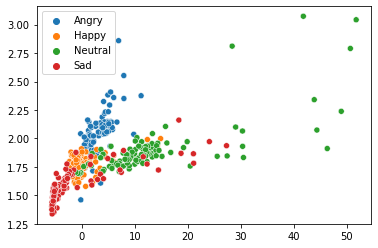

In [126]:
import seaborn 
seaborn.scatterplot(f,s,lable)

# Testing on Data

In [127]:
SERDataset = os.listdir("SERDataset/Test/")
fold = 'SERDataset/Test/'
#print(SERDataset)
count = 0
z = 0
mfc1 = []
Chrm1 = []
mel1 = []
cspec1 = []
tont1 = []
lable1= []
for  emotion in SERDataset:
    tmp = fold + SERDataset[count] + '/'
    files = os.listdir(tmp)
    Ext_Features(files , tmp ,SERDataset[count] , mfc1 , Chrm1, mel1 , cspec1  , tont1  , lable1)
    
    count = count + 1

Feat1 = np.hstack([Chrm1,mfc1,mel1,tont1,cspec1])
Feat1.shape

c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=690
  n_fft, y.shape[-1]


<IPython.core.display.Javascript object>

(60, 173)

# Support vector classifier

In [128]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(Feat, lable)
y_model = model.predict(Feat1)

In [129]:
y_model.shape

(60,)

# Accuracy

In [130]:
from sklearn.metrics import accuracy_score
a=accuracy_score(lable1,y_model)
b=a*100
print("Accuracy:" , b ,"%","OR",a)

Accuracy: 75.0 % OR 0.75


# One audio test.

In [157]:
T_Feat = []
t_mfcc =  []
t_chroma = []
t_melspec = []
t_cont_spec = []
t_tonnet = []
path = "SERDataset/Test/Sad/SM25_F34_S084.wav"
x , sam_r = librosa.load(path)
t_mfcc.append(Get_mean(librosa.feature.mfcc(x, sam_r)))
t_chroma.append(Get_mean(librosa.feature.chroma_stft(x, sam_r)))
t_melspec.append(Get_mean(librosa.feature.melspectrogram(x, sam_r)))
t_cont_spec.append(Get_mean(librosa.feature.spectral_contrast(x, sam_r)))
t_tonnet.append(Get_mean(librosa.feature.tonnetz(x, sam_r)))
T_Feat = np.hstack([t_mfcc, t_chroma , t_melspec , t_cont_spec ,t_tonnet ])


<IPython.core.display.Javascript object>

In [161]:
T_model = model.predict(T_Feat)

In [165]:
print(T_model)

['Angry']
